# <b><u> Project Title : Online Retail Customer Segmentation on Tansnational Tataset. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

#Importing Libraries

In [3]:
#Data Wrangling
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Supress future warnings
import warnings
warnings.filterwarnings('ignore')

#Reading the Dataset

In [4]:
#Define url for stored dataset
url = 'https://drive.google.com/uc?export=download&id=1rTzA2bJ6nZqjiHjuQ6lV4Y4ko2BAvXla'

#Read the csv file into pandas dataframe
data = pd.read_excel(url)

###Observing raw data visually 

In [5]:
#Getting the first 5 observations
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
#Getting the last 5 observations
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


###Getting the shape of dataset

In [7]:
data.shape

(541909, 8)

###Data Information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


###Descriptive Statistics

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


###Checking for Missing Observations

In [10]:
#Checking for the count of missing values 
print('Missing value count with respect to each column:')
data.isna().sum()

Missing value count with respect to each column:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

'CustomerID' column seems to contain a lot of missing values. Let's check how much of these constitute in our data, in percentage.

In [11]:
#Checking percentage missing values in our data.
print(round(data[['CustomerID', 'Description']].isnull().sum()/len(data)*100,2))

CustomerID     24.93
Description     0.27
dtype: float64


###Checking for Duplicate Observations

In [12]:
#Checking for the count of duplicate values 
print('Duplicate value count:')
len(data[data.duplicated()])

Duplicate value count:


5268

###**Observations**

* Our original Dataset contains 541909 rows and 8 columns.
* There are 3 numerical, 1 Date-Time and 4 catagorical features present in our dataset.
* Almost 25% values in 'CustomerID' feature of our original dataset contains missing values.
* There are 5268 duplicate observations present in our data.

#Data Cleaning

###Missing value treatment

* The observations suggest that about 25% of data does not have a CustomerID.
* Which means these purchases haven't been assigned to any customer.
* We must remove these observations as these do not help us in forming clusters, as these can't be related to a CustomerID.
* We can also remove missing values from the 'Description' feature.

In [13]:
#Dropping null values
data.dropna(inplace=True)

In [14]:
#Dataset shape after removing null values
data.shape

(406829, 8)

###Duplicate value treatment

* We can simply drop the duplicate values as these are very low in number.

In [15]:
#Dropping duplicate observations
data.drop_duplicates(inplace=True)

In [16]:
#Dataset shape after removing duplicate values
data.shape

(401604, 8)

###Cleaning some more

* As given in the data dictionary, some values in 'InvoiceNo' column contain observations beginning with 'c'


* "If this code (InvoiceNo) starts with letter 'c', it indicates a cancellation"
* We will drop these rows.

In [17]:
#Converting 'InvoiceNo' to string
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

In [18]:
#Viewing these observations
data[data['InvoiceNo'].str.contains('C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [19]:
#Removing observations with InvoiceNo beginning with 'c'
data = data[~data['InvoiceNo'].str.contains('C')]

In [20]:
#Dataset shape after removing observations with InvoiceNo beginning with 'c'
data.shape

(392732, 8)

In [21]:
#Dataset information after data cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


###**Observations**

* Our dataset no more contains any missing or duplicate values.
* We are left with 392732 rows after cleaning the data.

#Feature Engineering

##Date-Time features
* Our dataset contains 'InvoiceDate' feature which gives us the date and time of the transactions.
* We can extract saperate features for each year, month, day, etc.

In [22]:
#Converting 'InvoiceDate' to date-time format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [23]:
#Extracting the Year
data["Year"] = data["InvoiceDate"].apply(lambda x: x.year)

#Extracting the Month Name
data['Month'] = data["InvoiceDate"].apply(lambda x: x.month_name())

#Extracting the Month Number
data['MonthNum'] = data["InvoiceDate"].apply(lambda x: x.month)

#Extracting the Day Name
data['Day'] = data["InvoiceDate"].apply(lambda x: x.day_name())

#Extracting the Day Number
data["DayNum"] = data["InvoiceDate"].apply(lambda x: x.day)

#Extracting the Hour
data["Hour"] = data["InvoiceDate"].apply(lambda x: x.hour)

#Extracting the Minute
data["Minute"] = data["InvoiceDate"].apply(lambda x: x.minute)

##TotalAmount
* 'Quantity' feature gives us the quantity of product in one transaction
* 'UnitPrice' feature gives us the price of product per unit
* We can multiply these values to get the total amount per transaction

In [24]:
#Extracting 'TotalAmount' feature from 'Quantity' and 'UnitPrice'
data['TotalAmount']=data['Quantity']*data['UnitPrice']

##DayPart
* Now that we have extracted time features(Hour, Minute) we can divide these times of the day to get a catagorical feature called 'DayPart'.
* 'DayPart' gives us the part of the day(Morning, Afternoon, Evening) based on the hour of that day.

In [25]:
#Extracting 'DayPart' from 'Hour' feature
data['DayPart'] = data["Hour"].apply(
                                      lambda x : 'Morning' if 6<=x<=11 else ('Afternoon' if 12<=x<=17 else 'Evening')
                                  )

In [26]:
#Data overview after feature engineering
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthNum,Day,DayNum,Hour,Minute,TotalAmount,DayPart
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,20.34,Morning


In [27]:
#Shape of the data after feature engineering
data.shape

(392732, 17)

###**Observations**

* We have constructed 9 new features out of which 7 give us the information about the date and time saperately

#Exploratory Data Analysis

##Distribution of Numeric Features

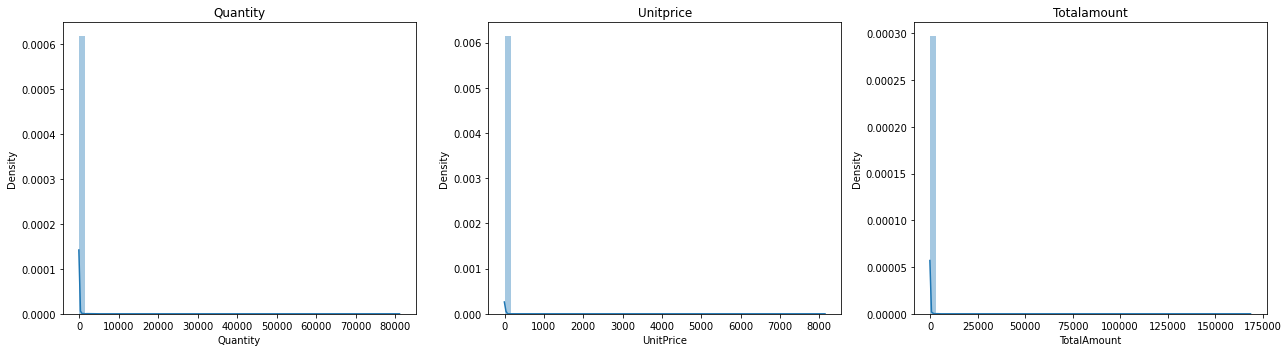

In [28]:
#Columns to analyse distribution
cols = ['Quantity','UnitPrice','TotalAmount']

#Plotting the distribution
plt.figure(figsize=(18,5))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(data[col])
  plt.title(col.title())
  plt.tight_layout()

* We can see that the 'Quantity', 'UnitPrice', 'TotalAmount' are all positively skewed.(mean > median > mode)
* Ideally we these features must be symmetric.(mean = median = mode)
* For this we must apply some kind of transformation to make these distributions close symmetric.
* Here, we will encorporate logarithmic transformation.

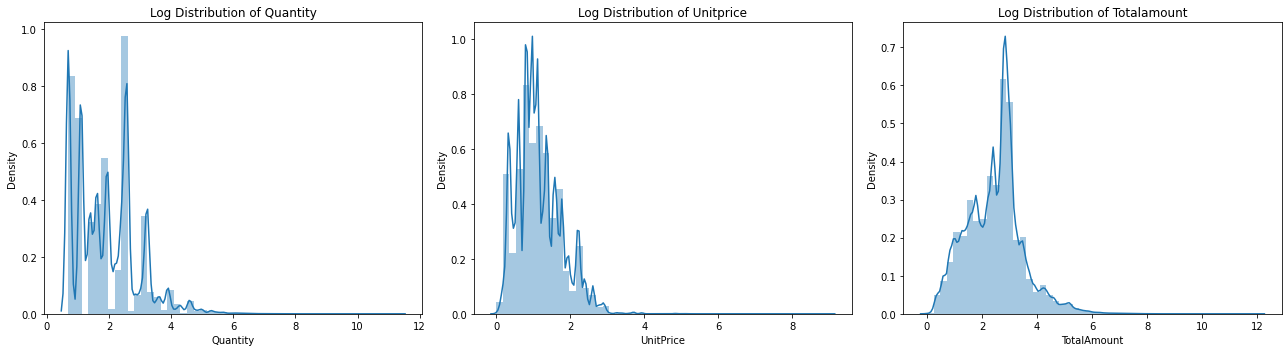

In [29]:
#Columns to analyse distribution
cols = ['Quantity','UnitPrice','TotalAmount']

#Plotting the distribution of log transformed features 
plt.figure(figsize=(18,5))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(np.log1p(data[col]))
  plt.title(f'Log Distribution of {col.title()}')
  plt.tight_layout()

##Product Wise Analysis

###Top and Bottom Products (Based on Frequency of Purchase)
We will explore the products and see the top and bottom five products based on their frequency.

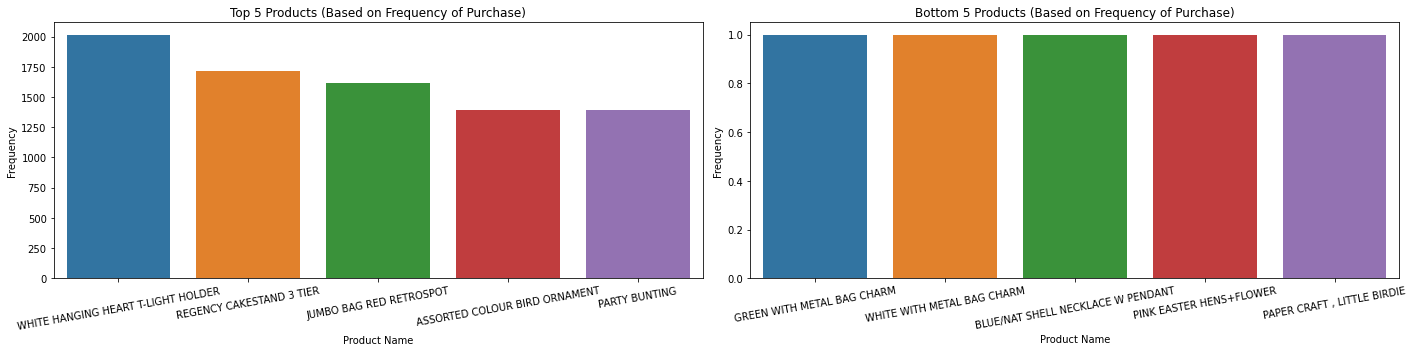

In [83]:
#Creating a dataframe that gives the product names and the count of their transactions
prod_count = data['Description'].value_counts().reset_index()

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='index', y='Description',data = prod_count[:5])
g1.set_xticklabels(g1.get_xticklabels(), rotation=10)
g1.set(title='Top 5 Products (Based on Frequency of Purchase)', xlabel='Product Name', ylabel='Frequency')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='index', y='Description',data = prod_count[-5:])
g2.set_xticklabels(g2.get_xticklabels(), rotation=10)
g2.set(title='Bottom 5 Products (Based on Frequency of Purchase)', xlabel='Product Name', ylabel='Frequency')
plt.tight_layout()

###Top and Bottom Products (Based on Quantity of Purchase)

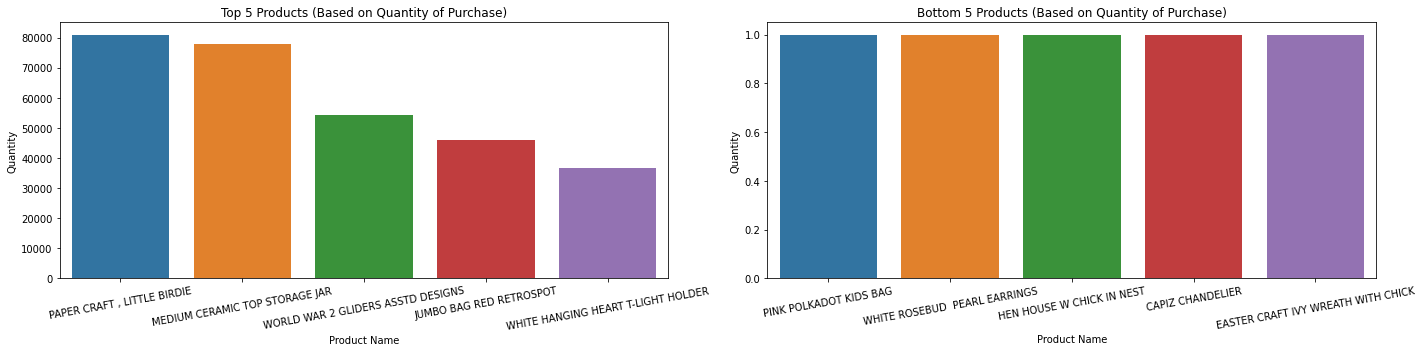

In [85]:
#Creating a dataframe that gives the product names and the quantity of their purchases
prod_qty = data.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Description', y='Quantity',data = prod_qty[:5])
g1.set_xticklabels(g1.get_xticklabels(), rotation=10)
g1.set(title='Top 5 Products (Based on Quantity of Purchase)', xlabel='Product Name', ylabel='Quantity')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Description', y='Quantity',data = prod_qty[-5:])
g2.set_xticklabels(g2.get_xticklabels(), rotation=10)
g2.set(title='Bottom 5 Products (Based on Quantity of Purchase)', xlabel='Product Name', ylabel='Quantity')
plt.tight_layout()

###Most Expensive and Cheapest Products per Unit

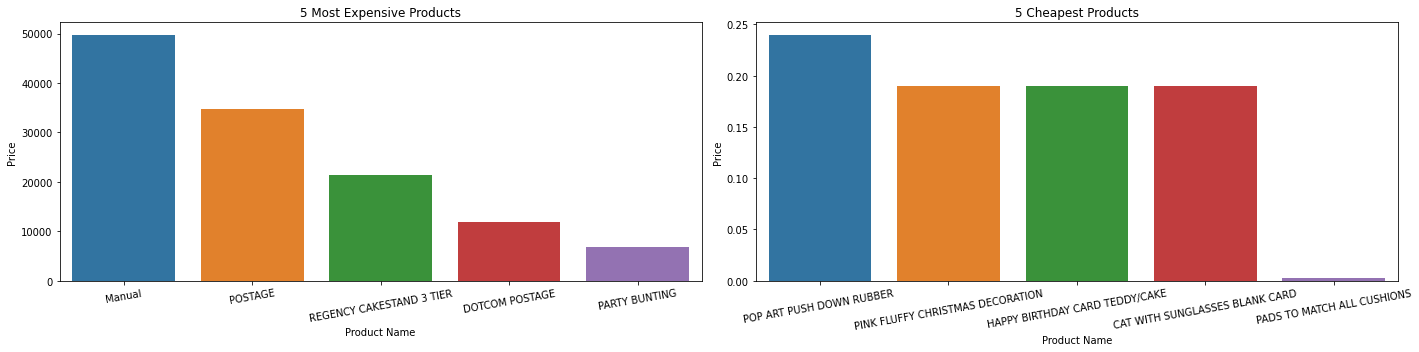

In [98]:
#Creating a dataframe that gives the product names with their unit price
prod_price = data.groupby("Description").sum()["UnitPrice"].reset_index().sort_values("UnitPrice",ascending=False)

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Description', y='UnitPrice',data = prod_price[:5])
g1.set_xticklabels(g1.get_xticklabels(), rotation=10)
g1.set(title='5 Most Expensive Products', xlabel='Product Name', ylabel='Price')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Description', y='UnitPrice',data = prod_price[-5:])
g2.set_xticklabels(g2.get_xticklabels(), rotation=10)
g2.set(title='5 Cheapest Products', xlabel='Product Name', ylabel='Price')
plt.tight_layout()

###Top and Bottom Products (Based on Total Revenue)

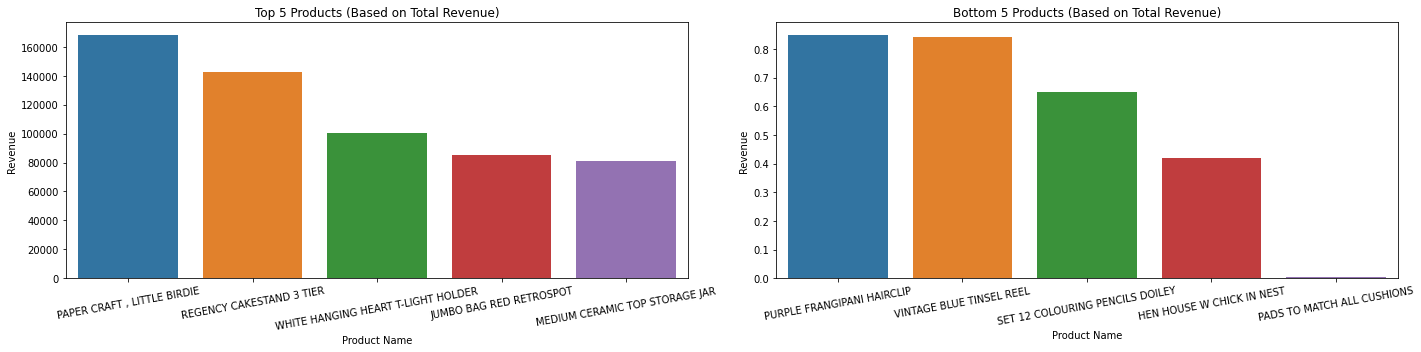

In [99]:
#Creating a dataframe that gives the product names and their total revenue
prod_rev = data.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Description', y='TotalAmount',data = prod_rev[:5])
g1.set_xticklabels(g1.get_xticklabels(), rotation=10)
g1.set(title='Top 5 Products (Based on Total Revenue)', xlabel='Product Name', ylabel='Revenue')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Description', y='TotalAmount',data = prod_rev[-5:])
g2.set_xticklabels(g2.get_xticklabels(), rotation=10)
g2.set(title='Bottom 5 Products (Based on Total Revenue)', xlabel='Product Name', ylabel='Revenue')
plt.tight_layout()

##Transactions w.r.t Date and Time

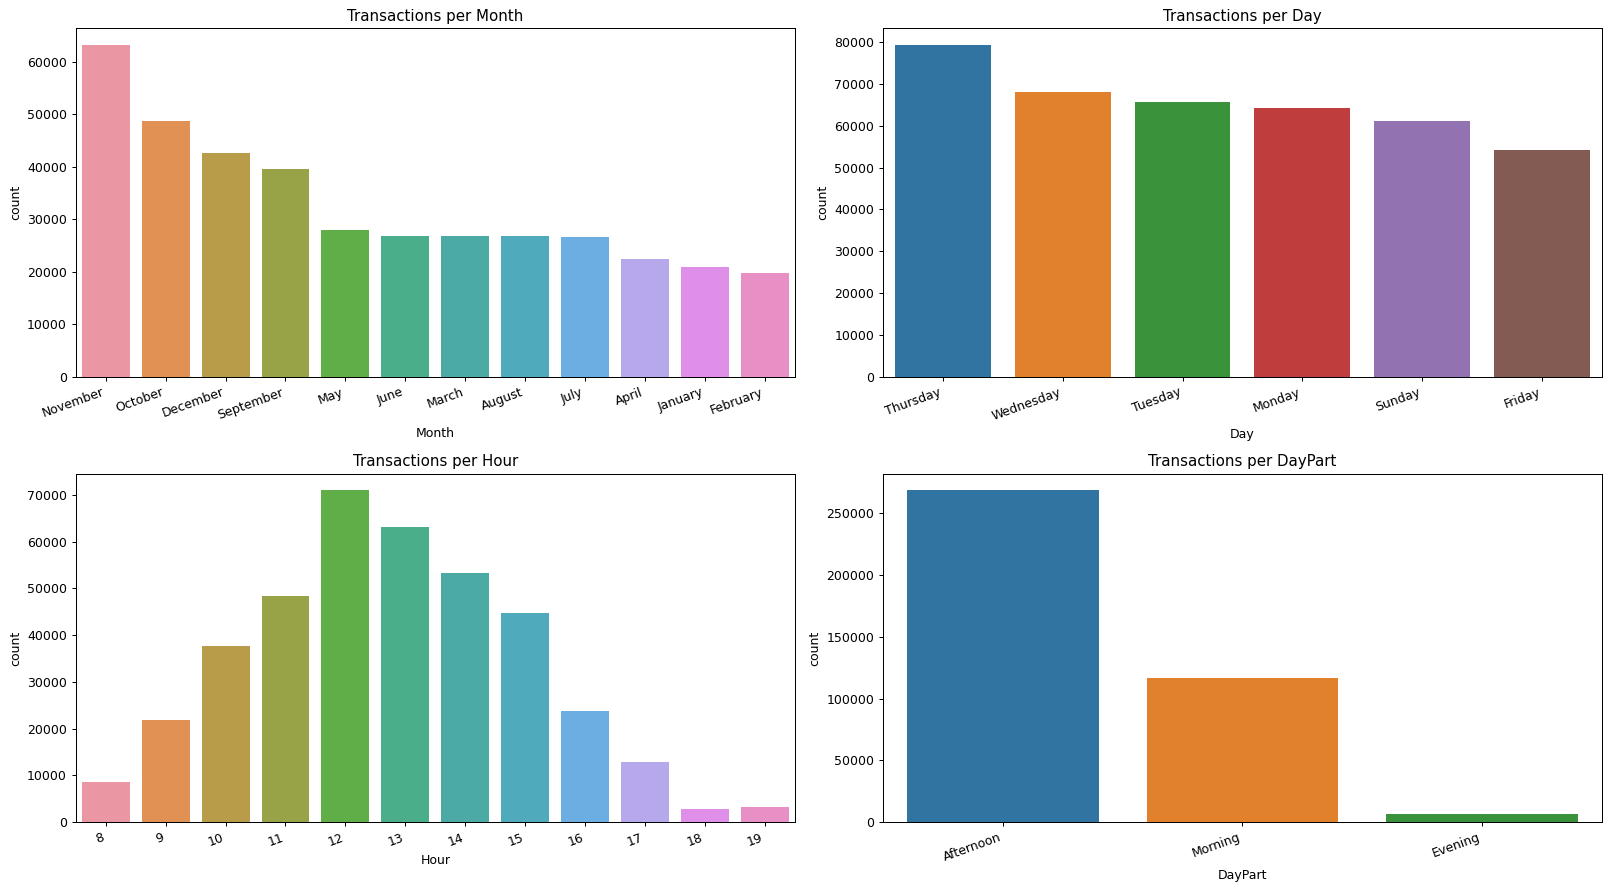

In [74]:
#Instantiate list of features to analyse
dt_features = ['Month', 'Day', 'Hour', 'DayPart']

#Plot these features
plt.figure(figsize=(18,10), dpi=90)
for n,col in enumerate(dt_features):
  plt.subplot(2, 2, n+1)
  temp = data[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.title(f'Transactions per {col}')
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

##Location Based Analysis

###Top and Bottom Countries (Based on Number of Transactions)

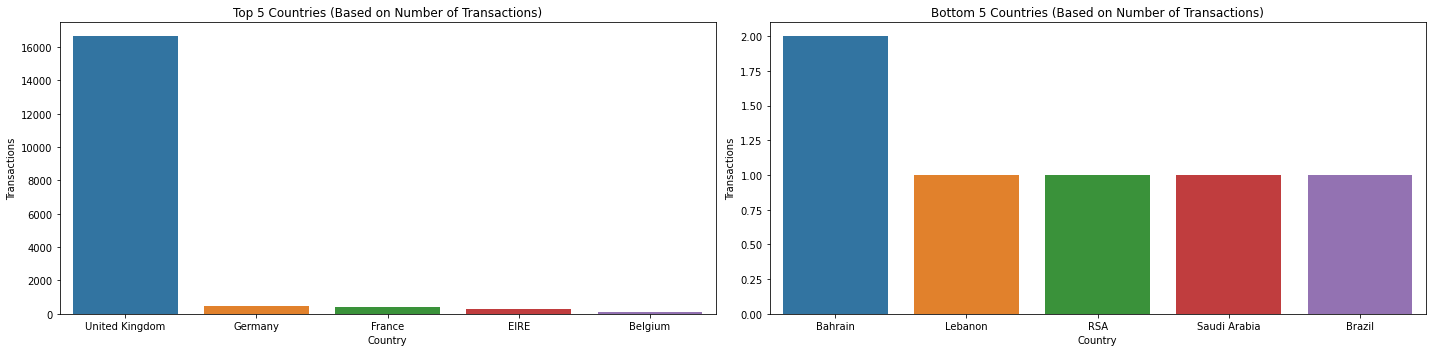

In [106]:
#Creating a dataframe that gives the country names and the count of their transactions
Country_transac = data.groupby("Country").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Country', y='InvoiceNo',data = Country_transac[:5])
g1.set(title='Top 5 Countries (Based on Number of Transactions)', xlabel='Country', ylabel='Transactions')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Country', y='InvoiceNo',data = Country_transac[-5:])
g2.set(title='Bottom 5 Countries (Based on Number of Transactions)', xlabel='Country', ylabel='Transactions')
plt.tight_layout()

###Top and Bottom Countries (Based on Number of Customers)

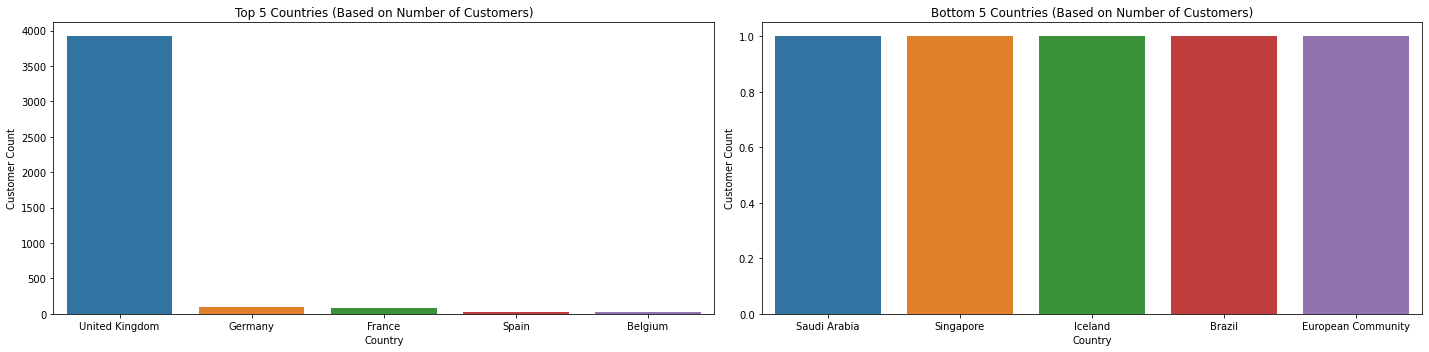

In [112]:
#Creating a dataframe that gives the country names and the count of the customers
country_cust = data.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Country', y='CustomerID',data = country_cust[:5])
g1.set(title='Top 5 Countries (Based on Number of Customers)', xlabel='Country', ylabel='Customer Count')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Country', y='CustomerID',data = country_cust[-5:])
g2.set(title='Bottom 5 Countries (Based on Number of Customers)', xlabel='Country', ylabel='Customer Count')
plt.tight_layout()

###Top and Bottom Countries (Based on Quantities Ordered)



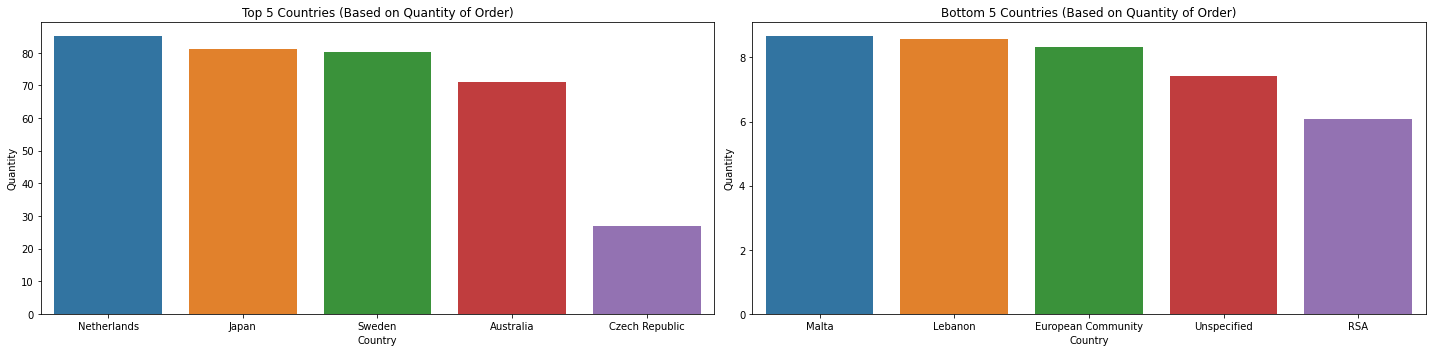

In [114]:
#Creating a dataframe that gives the country names and the quantity ordered
country_qty = data.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Country', y='Quantity',data = country_qty[:5])
g1.set(title='Top 5 Countries (Based on Quantity of Order)', xlabel='Country', ylabel='Quantity')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Country', y='Quantity',data = country_qty[-5:])
g2.set(title='Bottom 5 Countries (Based on Quantity of Order)', xlabel='Country', ylabel='Quantity')
plt.tight_layout()

###**Observations**

* Observations from the eda

#RFM Analysis

**Recency, Frequency, Monetary** value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: 
* **Recency**: How recently a customer has made a purchase
* **Frequency**: How often a customer makes a purchase. 
* **Monetary Value**: How much money a customer spends on



**Performing RFM Segmentation and RFM Analysis:**

* The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.
* The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).

*This approach does not require machine learning algorithms as segmentation can be done manually.*

##Creating RFM Dataframe

We will formulate the RFM dataset as follows
* Recency = Latest Date - Last Invoice Data
* Frequency = Count of invoice no. of transaction(s)
* Monetary = Sum of total amount for each customer

In [115]:
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create Recency-Frequency-Monetary Modelling scores for each customer
rfm_df = data.groupby('CustomerID').agg(
                                      {'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                       'InvoiceNo': lambda x: len(x), 
                                       'TotalAmount': lambda x: x.sum()}
                                        )

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

#Viewing the RFM data
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


##Getting R, F, and M scores

We will now get the individual scores for R, F and M by splitting Recency, Frequency	and Monetary values into 4 buckets based on their quantiles.

In [117]:
#Applying quantile cut method to saperate the column values based on their quantiles and assign labels
rfm_df['R'] = pd.qcut(rfm_df['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm_df['F'] = pd.qcut(rfm_df['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm_df['M'] = pd.qcut(rfm_df['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

#Viewing the RFM data
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


##Getting the RFM groups and scores for each customer

* We will group the R, F and M values to get the groups for each customer.
  * Explaination:
    * **Best Customer** - If a customer belongs to group **444**, they have made a purchase very recently and has high frequency and monetary value. 
    * **Worst Customer** - If a customer belongs to group **111**, it means made a purchase a long time ago and has low frequency and monetary value.

* We will give every customer an RFM score based on their individual R, F and M values.
  * Explaination:
    * **Best Customer** - High RFM Score
    * **Worst Customer** - Low RFM Score    

In [118]:
#Getting RFM groups
rfm_df['RFM_Group'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Getting RFM scores
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)

#Viewing the RFM data
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFMScore
0,12346.0,325,1,77183.60,1,1,4,114,6
1,12347.0,2,182,4310.00,4,4,4,444,12
2,12348.0,75,31,1797.24,2,2,4,224,8
3,12349.0,18,73,1757.55,3,3,4,334,10
4,12350.0,310,17,334.40,1,1,2,112,4


##Distribution of Recency, Frequency and Monetary Features

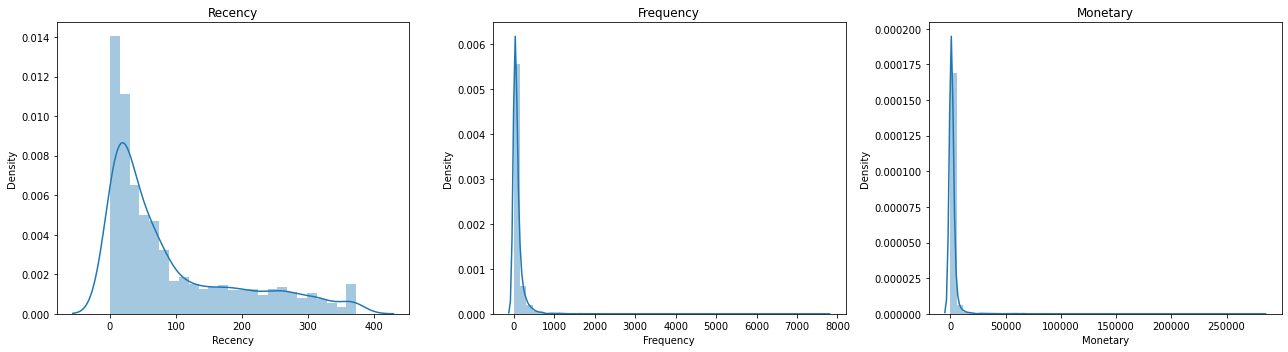

In [120]:
#Columns to analyse distribution
cols = ['Recency', 'Frequency',	'Monetary']

#Plotting the distribution
plt.figure(figsize=(18,5))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(rfm_df[col])
  plt.title(col.title())
  plt.tight_layout()

* The distributions all look skewed towards right.
* We can transform these features to make the distributions as close to a normal distributio as possible.
* We will apply log transformation here

In [121]:
#Replacing all the zero values to 1 to run the transformation without a hassle
rfm_df.replace(0.0,1,inplace=True)

#Applying Log transformation
rfm_df['Recency_Log']   = rfm_df['Recency'].apply(np.log)
rfm_df['Frequency_Log'] = rfm_df['Frequency'].apply(np.log)
rfm_df['Monetary_Log']  = rfm_df['Monetary'].apply(np.log)

#Viewing the RFM data
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFMScore,Recency_Log,Frequency_Log,Monetary_Log
0,12346.0,325,1,77183.60,1,1,4,114,6,5.783825,0.000000,11.253942
1,12347.0,2,182,4310.00,4,4,4,444,12,0.693147,5.204007,8.368693
2,12348.0,75,31,1797.24,2,2,4,224,8,4.317488,3.433987,7.494007
3,12349.0,18,73,1757.55,3,3,4,334,10,2.890372,4.290459,7.471676
4,12350.0,310,17,334.40,1,1,2,112,4,5.736572,2.833213,5.812338


Let's look at the distribution of the transformed features.

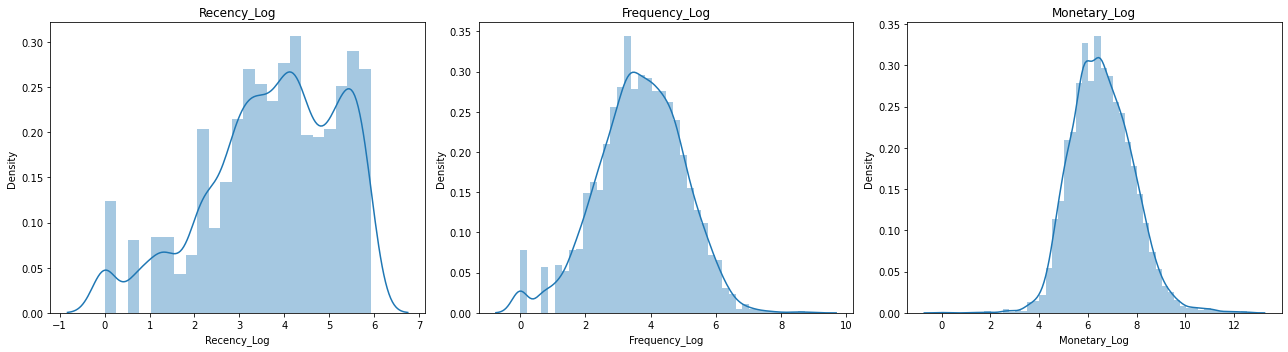

In [122]:
#Columns to analyse distribution
cols = ['Recency_Log', 'Frequency_Log',	'Monetary_Log']

#Plotting the distribution
plt.figure(figsize=(18,5))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(rfm_df[col])
  plt.title(col.title())
  plt.tight_layout()

###**Observations**

* Observations from the rfm analysis